# DAV 5400 Spring 2019 Project 4 - Predictive Analysis using scikit-learn
Adva Asraf 
<br>
Olga Kriyokov

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
import graphviz
import pydotplus
import matplotlib.pyplot as plt
from IPython.display import Image, display  
import os    
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/sa/Desktop/mushrooms_dataset.csv', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Phase I: Data Acquisition, Data Preparation & Exploratory Data Analysis



1: Associating dictionary with the dataframe columns.


In [3]:
column_names = ['class', 'cap shape', 'cap surface', 'cap color', 'bruised', 'odor',
    'gill attachment', 'gill spacing', 'gill size', 'gill color', 
    'stalk shape', 'stalk root', 'stalk surface above ring',
    'stalk surface below ring', 'stalk color above ring',
    'stalk color below ring', 'veil type', 'veil color', 'ring number',
    'ring type', 'spore print color', 'population', 'habitat']
data.columns = column_names
data.head()

,class,cap shape,cap surface,cap color,bruised,odor,gill attachment,gill spacing,gill size,gill color,...,stalk surface below ring,stalk color above ring,stalk color below ring,veil type,veil color,ring number,ring type,spore print color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


2: Selecting subset of columns from the dataframe.

In [4]:
data.describe()

,class,cap shape,cap surface,cap color,bruised,odor,gill attachment,gill spacing,gill size,gill color,...,stalk surface below ring,stalk color above ring,stalk color below ring,veil type,veil color,ring number,ring type,spore print color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


The details of each attribute could be seen above. We shall go with 'gill color' as a third column. It has a maximum number of unique instances i.e., 12. And for the fourth column we will select the 'population' attribute.

In [5]:
sub_data = data[['class','odor','gill color','population']]
sub_data.head()

,class,odor,gill color,population
0,p,p,k,s
1,e,a,k,n
2,e,l,n,n
3,p,p,n,s
4,e,n,k,a


3: Distribution of data for each selected column.

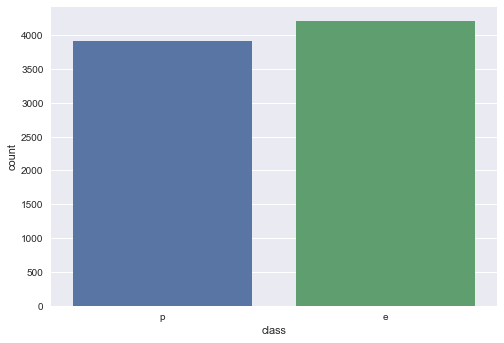

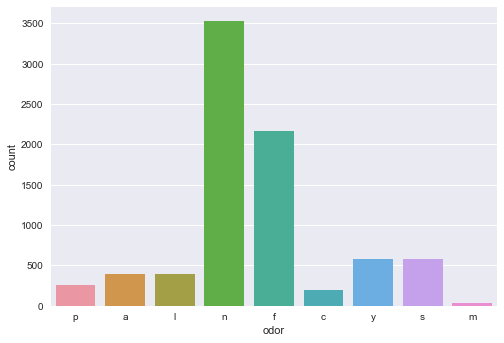

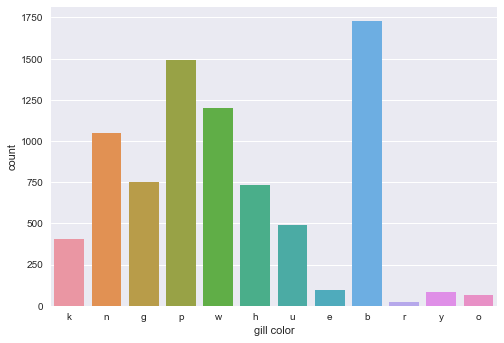

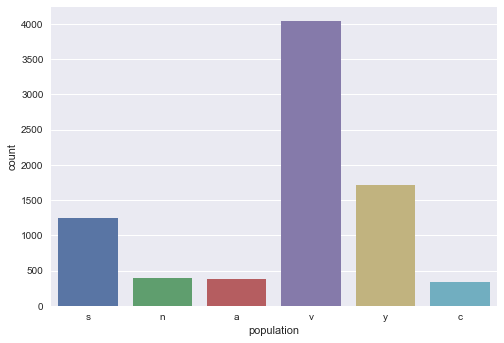

In [6]:
def plots():
    col = list(sub_data)
    for i in col:
        sns.countplot(x=i,data=sub_data)
        plt.show()
plots()

3.1: Distribution of features with respect to the target classes.

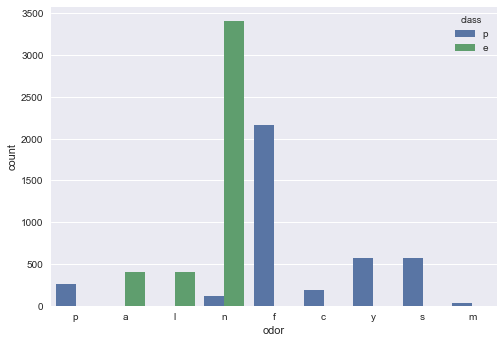

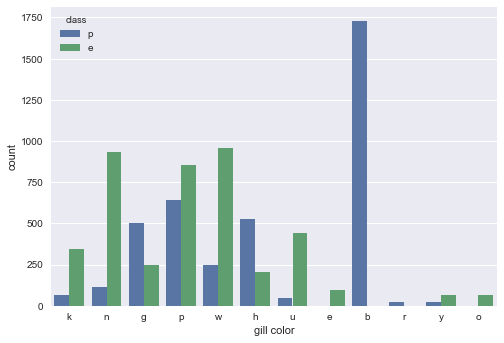

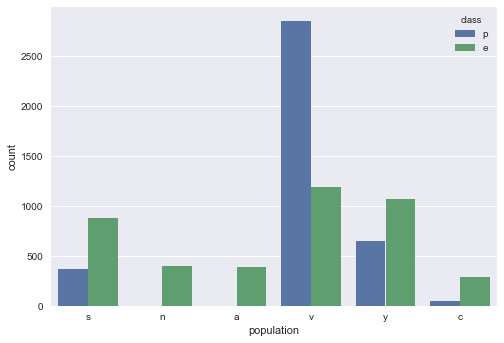

In [7]:
def plots_2():
    hue=sub_data['class']
    sns.countplot(x='odor',hue ='class' ,data=sub_data)
    plt.show()
    sns.countplot(x='gill color',hue ='class' ,data=sub_data)
    plt.show()
    sns.countplot(x='population',hue ='class' ,data=sub_data)
    plt.show()
plots_2()

4: The features columns and class names column will be separated and put into separate dataframes. 

In [8]:
labels = sub_data['class'].to_frame()
sub_data = sub_data.drop(['class'],axis=1)

5: The dataset has to be converted to numeric values i.e., one-hot encoding. (it will increase the feature space).

In [9]:
data_onehot = pd.get_dummies(sub_data)
data_onehot.head()

,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill color_b,...,gill color_r,gill color_u,gill color_w,gill color_y,population_a,population_c,population_n,population_s,population_v,population_y
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


6: For label encoding, we will use scikit-learn method to do that.

In [10]:
x = LabelEncoder()
labels_new = x.fit_transform(labels.values.ravel())
X = data_onehot
Y = labels_new

# Phase II: Build Predictive Model

## Decision Tree

### A brief overview of this algorithm: 
A root node is selected on the basis of its Information Gain. The selected root node has the maximum Information Gain among all the features. Information gain is calculated by entropy. The tree keeps going deep until the termination requirement isn't met, which happens when you run out of the attributes or you've reached the leaf nodes.


To get started, we will split the dataset  we created in the first phase, into a training and testing set. 20% of the data is held out for testing.


The predicted classes are as follows:
 [0 0 1 ... 0 1 0]

The results are as follows:
              precision    recall  f1-score   support

          0       0.99      1.00      0.99       853
          1       1.00      0.99      0.99       772

avg / total       0.99      0.99      0.99      1625

Accuracy: 0.9944615384615385

Following is the decision tree:



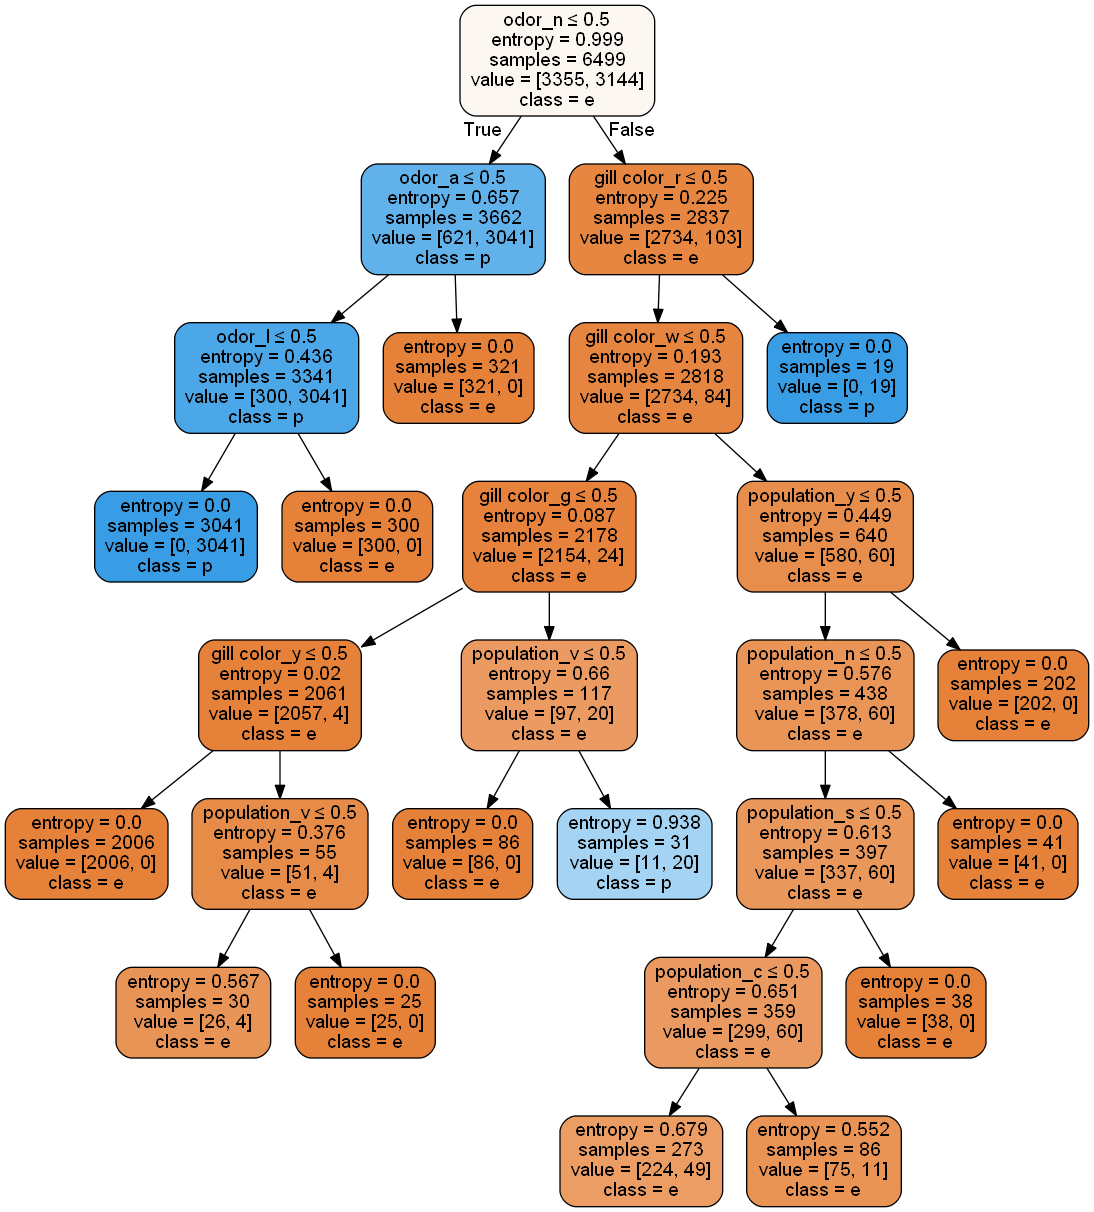

In [11]:
os.environ["PATH"] += os.pathsep + 'C:/Users/sa/Anaconda3/Library/bin/graphviz'

class classification():
    def __init__(self):
        #self.model = None
        self.y_pred = None
        
    
    def data_split(self):
        X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2)
        return(X_train, X_test,Y_train,Y_test)
   
    def create_model(self,X_train, X_test,Y_train,Y_test):
        #X_train, X_test,Y_train,Y_test = self.data_split()
        model = tree.DecisionTreeClassifier(criterion = 'entropy')
        model = model.fit(X_train, Y_train)
        return model
        
    def display_graph(self,model):
        dot_data = tree.export_graphviz(model, out_file=None, 
                         feature_names=X.columns,
                        class_names=['e','p'],
                         filled=True, rounded=True,  
                         special_characters=True)  
        
        graph = pydotplus.graph_from_dot_data(dot_data)  
        display(Image(graph.create_png()))
    
    def predict(self, X_test,model):
        self.y_pred = model.predict(X_test)
        print('\nThe predicted classes are as follows:\n', self.y_pred)
        
    def results(self, Y_test):
        print('\nThe results are as follows:\n', classification_report(Y_test, self.y_pred))
        print("Accuracy:",metrics.accuracy_score(Y_test, self.y_pred))

        
if __name__ == "__main__":
    obj = classification()
    X_train, X_test,Y_train,Y_test = obj.data_split()
    model = obj.create_model(X_train, X_test,Y_train,Y_test)
    obj.predict(X_test,model)
    obj.results(Y_test)
    print('\nFollowing is the decision tree:\n')
    obj.display_graph(model)


Now we will see the importance of each feature in classification.

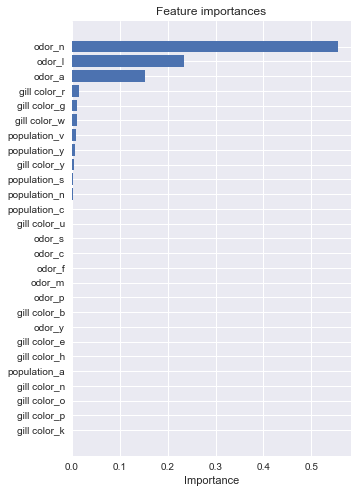

In [12]:
features_list = X.columns.values
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(5,8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.show()

# Conclusion:

Decision trees are easy to use and visualize. They don't require too much of preprocessing of the data.
And in this case, the decision tree resulted into a clear model.   
In order to avoid overfitting, k-fold cross validation could be applied.